# **House Price Prediction**

In this notebook, there is house price predicting model to predict the house price by area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,
airconditioning,parking,prefarea,furnishingstatus .

# Importing the packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Importing Data

In [2]:
data=pd.read_csv("/kaggle/input/housing-prices-dataset/Housing.csv")
df=pd.DataFrame(data)

# Exploratory Data Analysis

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
df.shape

(545, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
df.nunique()


price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

# Analysis by charts

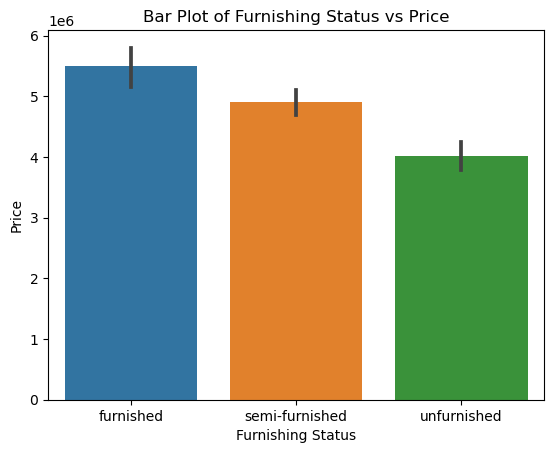

In [8]:
sns.barplot(x='furnishingstatus', y='price', data=data)
plt.title('Bar Plot of Furnishing Status vs Price')
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


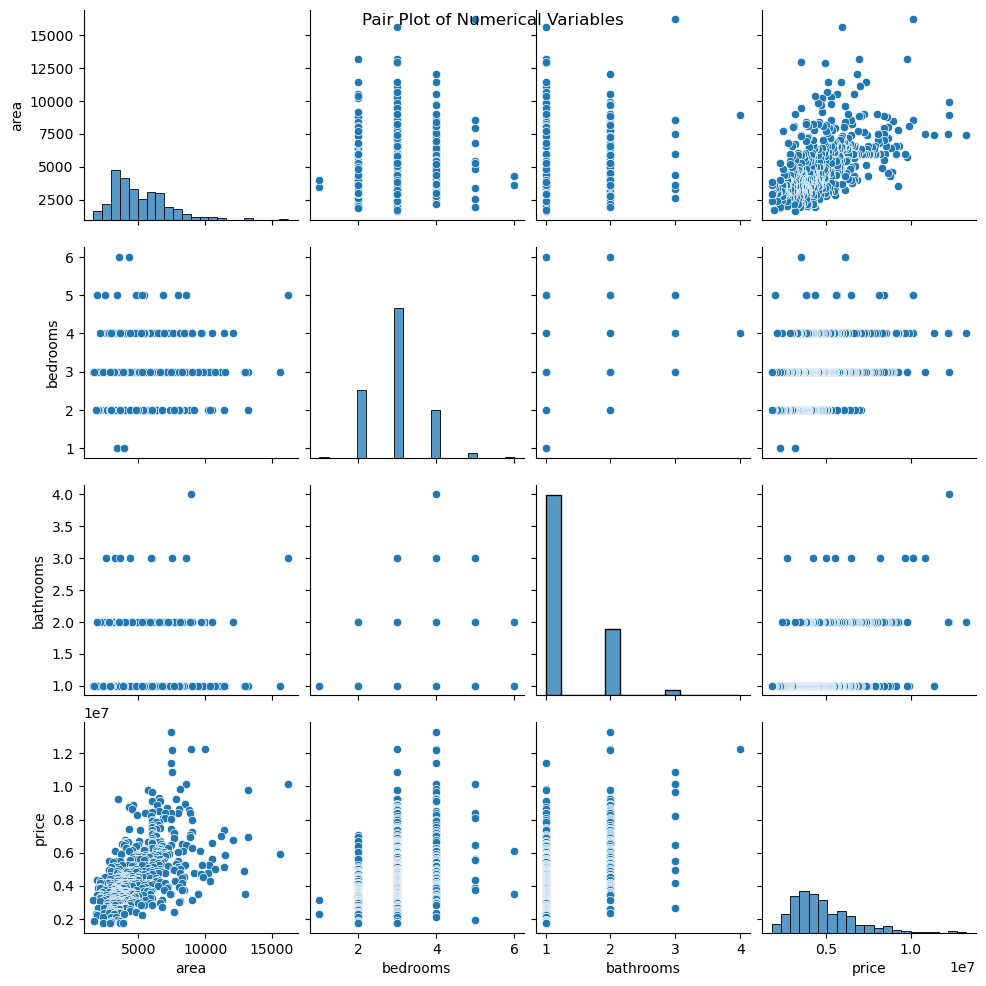

In [9]:
sns.pairplot(data, vars=['area', 'bedrooms', 'bathrooms', 'price'])
plt.suptitle('Pair Plot of Numerical Variables')
plt.show()

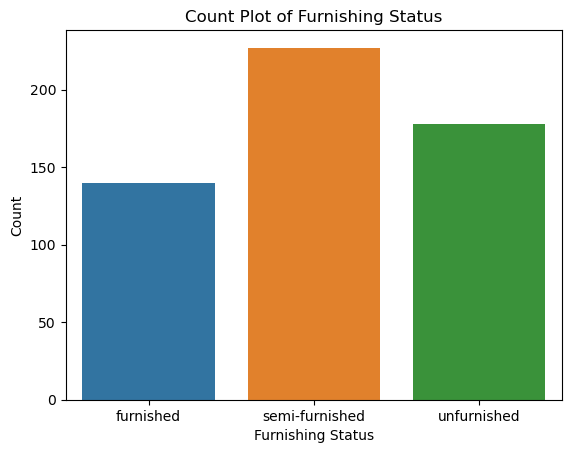

In [10]:
sns.countplot(x='furnishingstatus', data=data)
plt.title('Count Plot of Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Count')
plt.show()

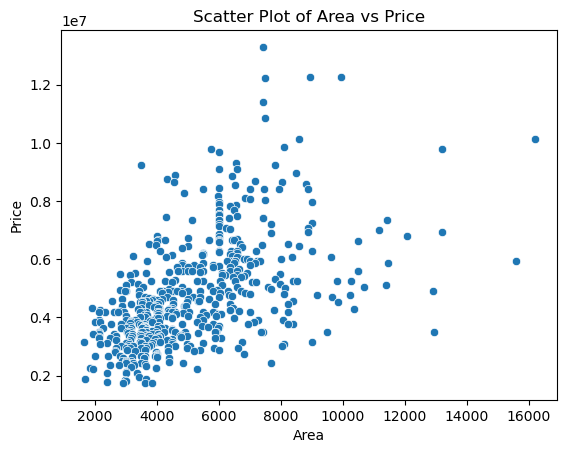

In [11]:
sns.scatterplot(x='area', y='price', data=data)
plt.title('Scatter Plot of Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

# Correlation between Price and Other Variables

In [12]:
correlation_matrix = data.corr(numeric_only=True)
price_correlations = correlation_matrix['price'].sort_values(ascending=False)
print(price_correlations)

price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64


# HeatMap

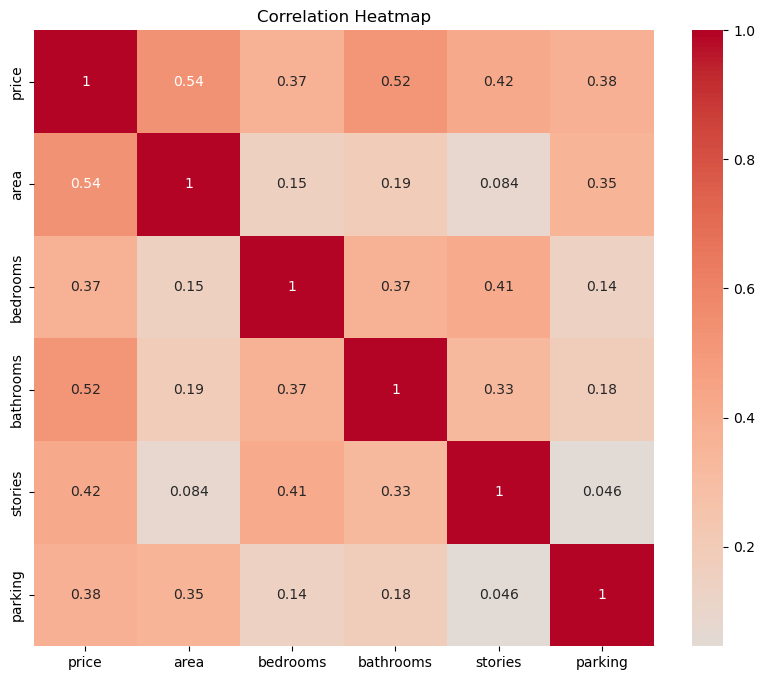

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


# Split the data into training and testing sets

In [14]:
# Define features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define preprocessing steps

In [15]:

categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Creating and Training Model

In [16]:
# Create a Random Forest regression model
model = RandomForestRegressor(n_estimators=10, max_depth=210, random_state=42)


# Create a pipeline for preprocessing and modeling
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])


# Train the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning',
                                                   'prefarea',
                                                   'furnishingstatus'])])),
                ('model',
                 RandomForestRegressor(max_depth=210, n_estimators=10,
                                       random_state=42))])

# Making Prediction and  Calculting Mean Square Error

In [17]:
# Make predictions on the test set

y_pred = pipeline.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 2795688337109.0913


# Predict the price for a new house

In [18]:

new_house_features = pd.DataFrame({
    'area': [3000],  # Adjust the values based on the new house
    'bedrooms': [2],
    'bathrooms': [1],
    'stories': [1],
    'mainroad': ['yes'],
    'guestroom': ['no'],
    'basement': ['yes'],
    'hotwaterheating': ['no'],
    'airconditioning': ['no'],
    'parking': [2],
    'prefarea': ['yes'],
    'furnishingstatus': ['unfurnished']
})

predicted_price = pipeline.predict(new_house_features)
print(f"Predicted Price for the new house: {predicted_price[0]}")

Predicted Price for the new house: 4480078.661616161
